In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LABELS
Each training and test example is assigned to one of the following labels:
- 0 T-Shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Angle boot

In [2]:
img_rows, img_cols = 28, 28

train_set = pd.read_csv('fashion-mnist_train.csv')
test_set = pd.read_csv('fashion-mnist_test.csv')
raw_train = np.array(train_set, dtype = 'float32')
raw_test = np.array(test_set, dtype = 'float32')

x_train = raw_train[:, 1:]/255.0
y_train = raw_train[:, 0].astype('int32')

x_test = raw_test[:, 1:]/255.0
y_test = raw_test[:, 0].astype('int32')

x_train = x_train.reshape(y_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(y_test.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
y_train_values = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'bag', 'Angle boot']

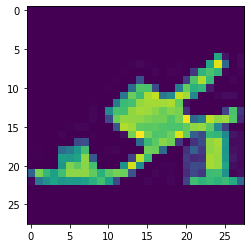

In [4]:
plt.imshow(x_train[50].reshape(28, 28))

In [5]:
print(f'{y_train[50]} ==> {y_train_values[y_train[50]]}')

5 ==> Sandal


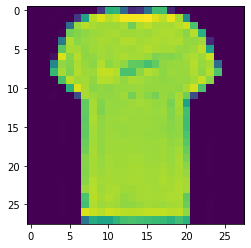

In [6]:
plt.imshow(x_train[10].reshape(28, 28))

In [7]:
print(f'{y_train[10]} ==> {y_train_values[y_train[10]]}')

0 ==> T-shirt/top


In [8]:
#creating validation set from the train set

from sklearn.model_selection import train_test_split

x_train = train_set.drop('label', axis=1)
y_train = train_set['label'].copy()
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
print(f'Length of Train set: {len(X_train)}')
print(f'Length of Validation set: {len(X_val)}')#20% of the train set


Length of Train set: 48000
Length of Validation set: 12000


In [10]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31766,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,11,37,6,0,0,0


In [11]:
y_train.head()

48572    5
38696    7
13611    8
35213    5
31766    2
Name: label, dtype: int64

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48000 entries, 48572 to 56422
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 287.5 MB


In [13]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 12628 to 36568
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 71.9 MB


In [14]:
#scaling the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

#training with logistic regression
from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class ='multinomial', solver='lbfgs', C=10)
softmax.fit(X_train_scaled, y_train)
    
    
#training with SGDCLASSIFIER
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)
    
#training with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
    
#training with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
print(f'SOFTMAX REGRESSION TESTING ACCURACY: {(softmax.score(X_train_scaled, y_train)*100)}%')
print(f'SGD CLASSIFIER TESTING ACCURACY: {(sgd.score(X_train_scaled, y_train)*100)}%')
print(f'DECISION TREE TESTING ACCURACY: {(tree.score(X_train_scaled, y_train)*100)}%')
print(f'RANDOMFOREST TESTING ACCURACY: {(forest.score(X_train_scaled, y_train)*100)}%')

SOFTMAX REGRESSION TESTING ACCURACY: 88.02499999999999%
SGD CLASSIFIER TESTING ACCURACY: 85.03958333333334%
DECISION TREE TESTING ACCURACY: 100.0%
RANDOMFOREST TESTING ACCURACY: 100.0%


## Cross Validation Scores 

In [16]:
from sklearn.model_selection import cross_val_score
softmax_scores = cross_val_score(softmax, X_train_scaled, y_train, cv=3, scoring='accuracy')

sgd_scores = cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring='accuracy')

tree_scores = cross_val_score(tree, X_train_scaled, y_train, cv=3, scoring='accuracy')

forest_scores = cross_val_score(forest, X_train_scaled, y_train, cv=3, scoring='accuracy')


print('SOFTMAX REGRESSION CROSS VALIDATION\n')
print('Scores:', softmax_scores)
print('Mean:', softmax_scores.mean())
print('Standard Deviation:', softmax_scores.std())
print('='*20)
print('SGDCLASSIFIER CROSS VALIDATION\n')
print('Scores:', sgd_scores)
print('Mean:', sgd_scores.mean())
print('Standard Deviation:', sgd_scores.std())
print('DECISION TREE CROSS VALIDATION\n')
print('Scores:', tree_scores)
print('Mean:', tree_scores.mean())
print('Standard Deviation:', tree_scores.std())
print('='*20)
print('RANDOMFOREST CROSS VALIDATION\n')
print('Scores:', forest_scores)
print('Mean:', forest_scores.mean())
print('Standard Deviation:', forest_scores.std())

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

SOFTMAX REGRESSION CROSS VALIDATION

Scores: [0.8456875 0.836     0.843625 ]
Mean: 0.8417708333333334
Standard Deviation: 0.004166562498697905
SGDCLASSIFIER CROSS VALIDATION

Scores: [0.8318125 0.8325    0.8293125]
Mean: 0.8312083333333332
Standard Deviation: 0.0013696233261577952
DECISION TREE CROSS VALIDATION

Scores: [0.7864375 0.7830625 0.7825625]
Mean: 0.7840208333333334
Standard Deviation: 0.0017209897023386074
RANDOMFOREST CROSS VALIDATION

Scores: [0.87875   0.875375  0.8761875]
Mean: 0.8767708333333334
Standard Deviation: 0.001438254632841109


In [17]:
#saving the models
import joblib

#softmax
joblib.dump(softmax, 'fashion_mnist_softmax_clf.pkl')

#sgd
joblib.dump(sgd, 'fashion_mnist_sgd_clf.pkl')

#tree
joblib.dump(tree, 'fashion_mnist_tree_clf.pkl')

#forest
joblib.dump(forest, 'fashion_mnist_forest_clf.pkl')

['fashion_mnist_forest_clf.pkl']

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

softmax_predictions = cross_val_predict(softmax, X_train_scaled, y_train, cv=3)
softmax_confusion_matrix = confusion_matrix(y_train, softmax_predictions)

sgd_predictions = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
sgd_confusion_matrix = confusion_matrix(y_train, sgd_predictions)

tree_predictions = cross_val_predict(tree, X_train_scaled, y_train, cv=3)
tree_confusion_matrix = confusion_matrix(y_train, tree_predictions)

forest_predictions = cross_val_predict(forest, X_train_scaled, y_train, cv=3)
forest_confusion_matrix = confusion_matrix(y_train, forest_predictions)

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [19]:

print('LOGISTIC REGRESSION(SOFTMAX) CONFUSION MATRIX: \n', softmax_confusion_matrix)
print('-------------------------------------------------------------------------------')
print('SGD CLASSIFIER CONFUSION MATRIX: \n', sgd_confusion_matrix)
print('-------------------------------------------------------------------------------')
print('DECISIONTREE CLASSIFIER CONFUSION MATRIX: \n', tree_confusion_matrix)
print('-------------------------------------------------------------------------------')
print('RANDOMFOREST CLASSIFIER CONFUSION MATRIX: \n', forest_confusion_matrix)
print('-------------------------------------------------------------------------------')

LOGISTIC REGRESSION(SOFTMAX) CONFUSION MATRIX: 
 [[3850   23  101  230   23    7  462    5   64    3]
 [  19 4663   23   87   13    0   15    2    4    0]
 [ 104   18 3539   62  559    8  472    4   33    1]
 [ 196   68   59 4086  156    2  161    5   23    2]
 [  22   12  474  187 3638    2  449    0   31    0]
 [   3    1    1    6    0 4481    6  204   44  113]
 [ 677   14  549  175  478    3 2765    4   87    5]
 [   0    0    1    0    0  191    0 4388   16  180]
 [  41    7   36   42   37   41  102   36 4490   19]
 [   0    0    0    1    0   97    0  180    7 4505]]
-------------------------------------------------------------------------------
SGD CLASSIFIER CONFUSION MATRIX: 
 [[3720   17   82  373   24    1  475    0   76    0]
 [  14 4571   30  161   15    0   31    0    4    0]
 [  35    6 3454   97  626    0  533    1   48    0]
 [ 177   69   65 4117  150    0  169    0   11    0]
 [   5    4  511  315 3532    0  430    0   18    0]
 [   2    1    2    9    0 4472   13  21

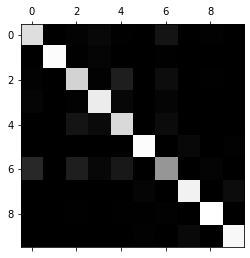

In [20]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(forest_confusion_matrix, cmap=plt.cm.gray)

from above the confusion matrix looks fairly good since most images are on the main diagonal, i.e they were classified correctly.
some look slightly darker like the 6 than the other, which could be that the model doesn't perform well on them or there are fewer images of 6 in the dateset.
we can verify both focusing on only the error as shown below

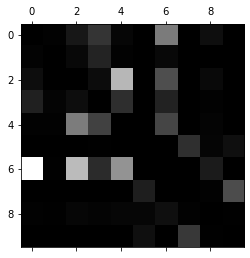

In [21]:
row_sums = forest_confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = forest_confusion_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

the image representation above clearly show the errors the randomforest classifier makes.
Rows represent the actual class
Columns represent the predicted classes
row 6 shows that there were fewer classes of values assigned to 6's is the dataset

## Fitting the RandomForestClassifier on the Validation set

In [22]:
X_val_scaled = scaler.transform(X_val)

In [23]:
y_val_predictions = forest.predict(X_val_scaled)

In [24]:
val_scores = cross_val_score(forest, X_val_scaled, y_val, cv=3, scoring='accuracy')

print('Scores:', val_scores)
print('Mean:', val_scores.mean())
print('Standard Deviation:', val_scores.std())
print('\n')


Scores: [0.85475 0.84225 0.851  ]
Mean: 0.8493333333333334
Standard Deviation: 0.0052374187874901995




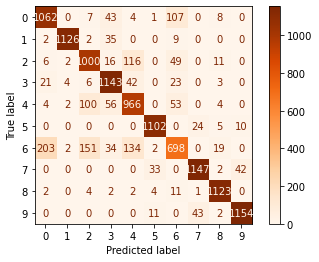

In [25]:
#plotting confusion matrix for SGDClassifier
from sklearn.metrics import plot_confusion_matrix

conf_mat = plot_confusion_matrix(forest, X_val_scaled, y_val, cmap='Oranges', values_format='d')

In [26]:
conf_mat.confusion_matrix

array([[1062,    0,    7,   43,    4,    1,  107,    0,    8,    0],
       [   2, 1126,    2,   35,    0,    0,    9,    0,    0,    0],
       [   6,    2, 1000,   16,  116,    0,   49,    0,   11,    0],
       [  21,    4,    6, 1143,   42,    0,   23,    0,    3,    0],
       [   4,    2,  100,   56,  966,    0,   53,    0,    4,    0],
       [   0,    0,    0,    0,    0, 1102,    0,   24,    5,   10],
       [ 203,    2,  151,   34,  134,    2,  698,    0,   19,    0],
       [   0,    0,    0,    0,    0,   33,    0, 1147,    2,   42],
       [   2,    0,    4,    2,    2,    4,   11,    1, 1123,    0],
       [   0,    0,    0,    0,    0,   11,    0,   43,    2, 1154]],
      dtype=int64)

from the representation shown above it shows that the RandomForestClassifier also perfoms fairly good on new instances.

In [30]:
#PRECISION AND RECALL SCORE
from sklearn.metrics import precision_score, recall_score
print('Precision Score:\n', precision_score(y_val, y_val_predictions, average=None))
print('Recall Score:\n', recall_score(y_val, y_val_predictions, average=None))

Precision Score:
 [0.81692308 0.99119718 0.78740157 0.86004515 0.76424051 0.95576756
 0.73473684 0.94403292 0.95412065 0.95688226]
Recall Score:
 [0.86201299 0.95911414 0.83333333 0.92028986 0.81518987 0.96581946
 0.56154465 0.9370915  0.97737163 0.95371901]


# Observation on Precision and Recall Score
since we trained a multiclass classification and not binary classifier, setting the average=None will return the precision scores for each class.
while also setting the average='micro' will return the total ratio of tp/(tp+fp)

FITTING MODEL TO TEST SET

In [31]:
import joblib
joblib.load('fashion_mnist_forest_clf.pkl')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
x_test = test_set.drop('label', axis=1)
y_test = test_set['label'].copy()
X_test = scaler.transform(x_test)

y_test_predictions = forest.predict(X_test)

In [40]:
y_test_predicted = pd.DataFrame(y_test_predictions, columns=['Predicted Label'])

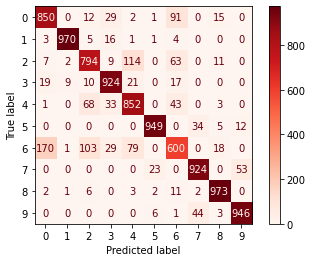

In [41]:
#plotting confusion matrix for SGDClassifier
from sklearn.metrics import plot_confusion_matrix

conf_mat = plot_confusion_matrix(forest, X_test, y_test, cmap='Reds', values_format='d')

In [42]:
y_test_predicted.head()

,Predicted Label
0,0
1,1
2,2
3,2
4,3


In [ ]:
y_test_predicted.to_csv('Fashion_mnist_predicted')